In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [2]:
df=pd.read_csv('btc-eth-prices-outliers.csv',index_col=0,parse_dates=True)

In [3]:
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


<Axes: xlabel='Timestamp'>

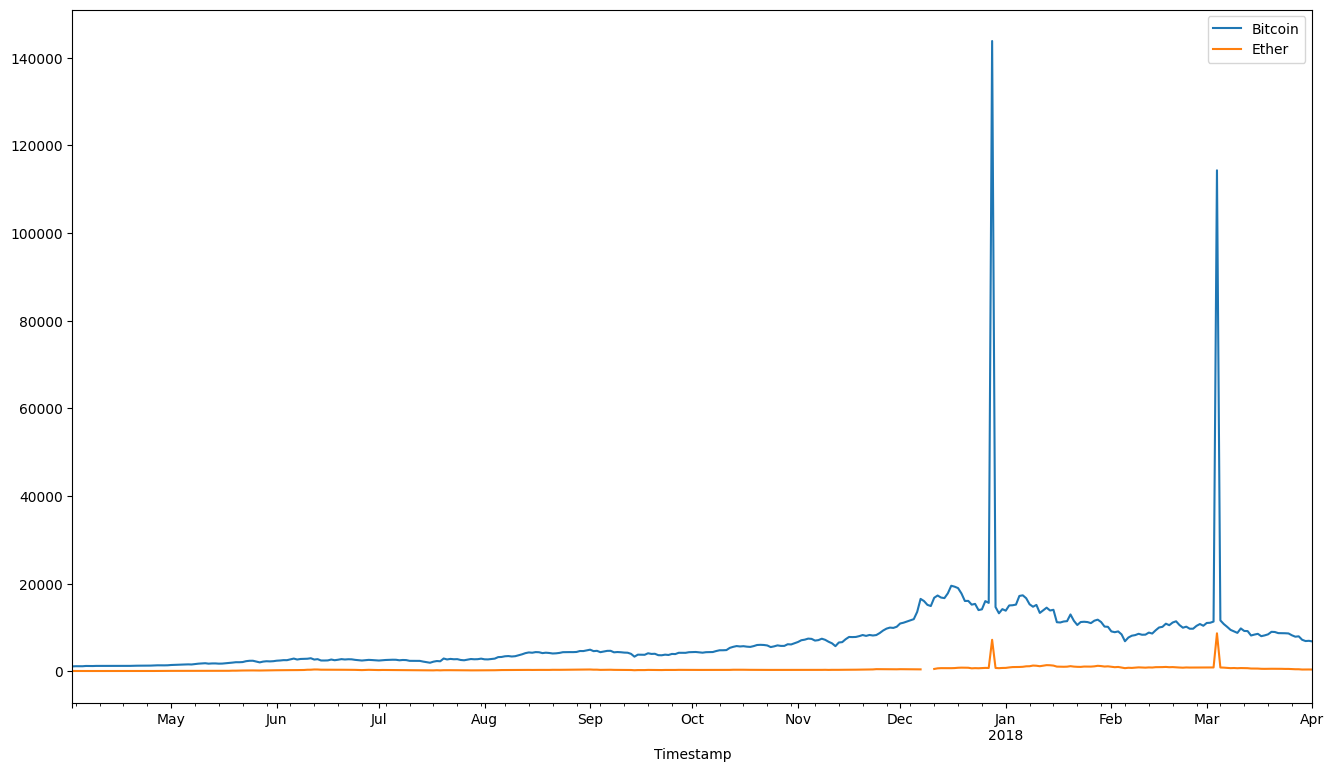

In [4]:
df.plot(figsize=(16,9))

<Axes: xlabel='Timestamp'>

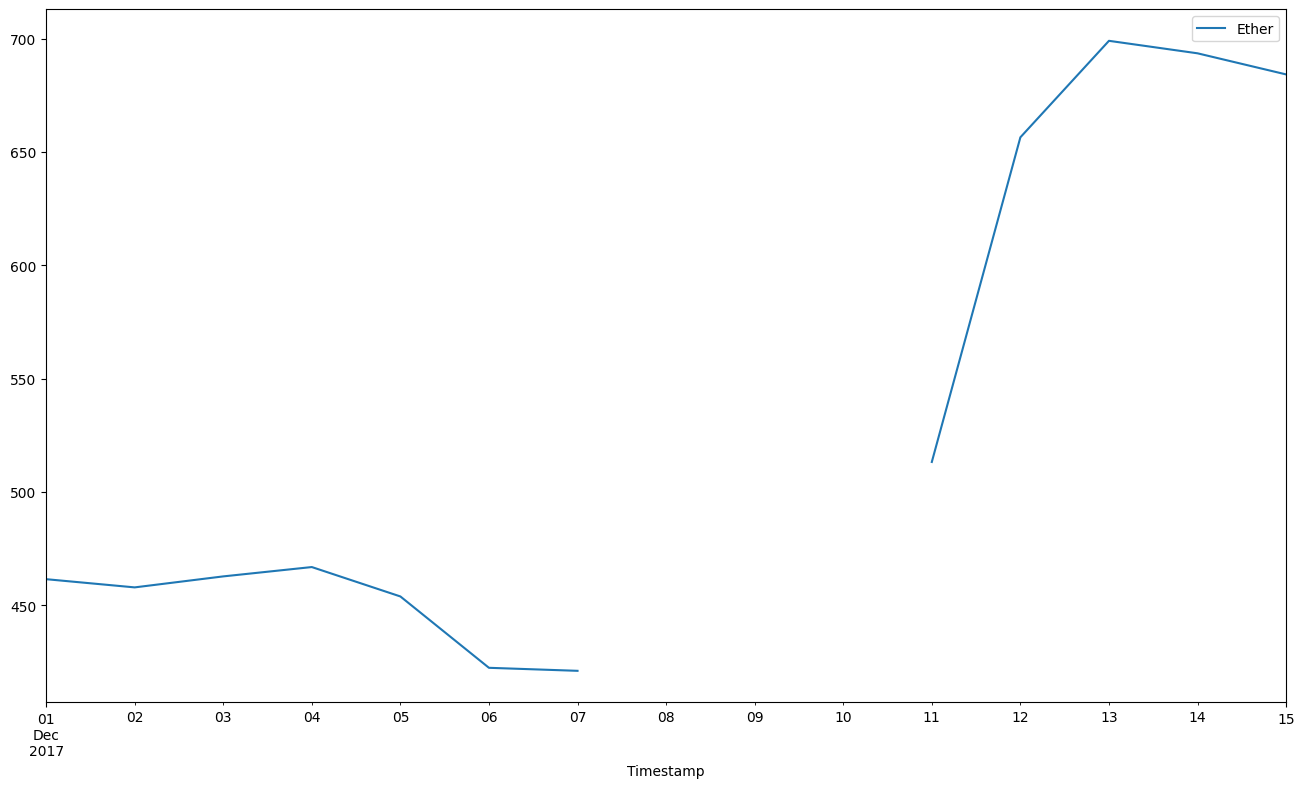

In [5]:
df.loc['2017-12':'2017-12-15'].plot(y='Ether',figsize=(16,9))

<Axes: xlabel='Timestamp'>

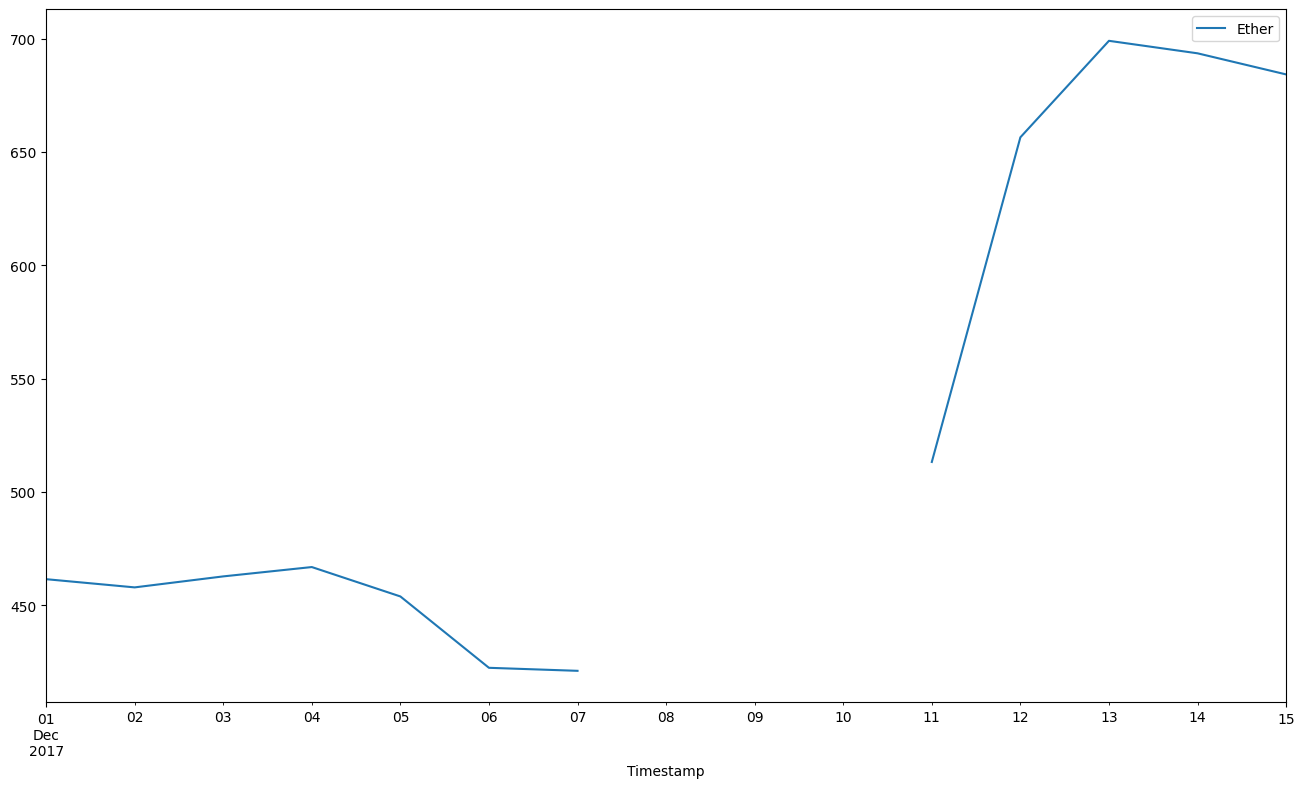

In [6]:
df.loc['2017-12':'2017-12-15'].plot(y='Ether',figsize=(16,9))

In [7]:
df_na=df.loc['2017-12':'2017-12-15']

In [8]:
df_na['Ether'].isna().values.any()

True

In [9]:
df_na.loc[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [10]:
df.loc['2017-12-06':'2017-12-12']

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [11]:
df.loc['2017-12-06':'2017-12-12'].bfill()

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [12]:
df=df.bfill()

<Axes: xlabel='Timestamp'>

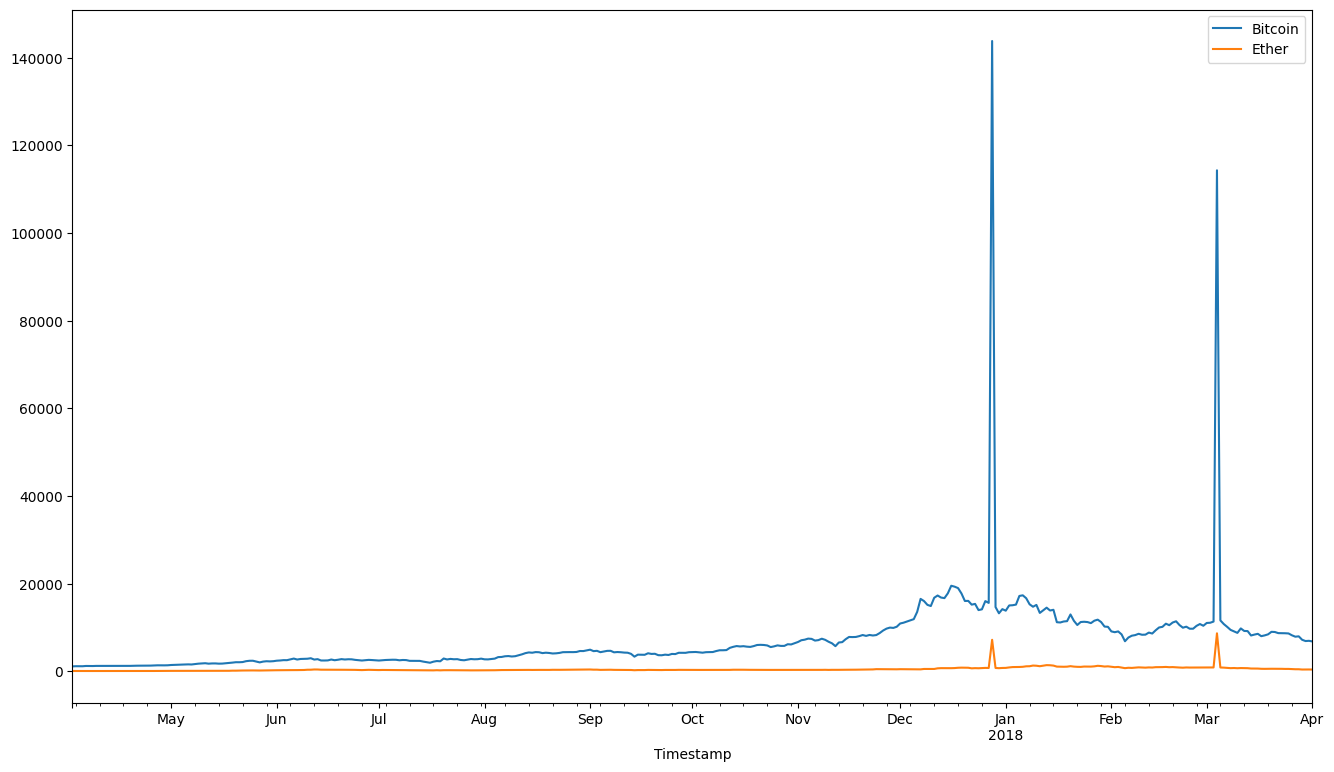

In [13]:
df.plot(figsize=(16,9))

<Axes: xlabel='Timestamp'>

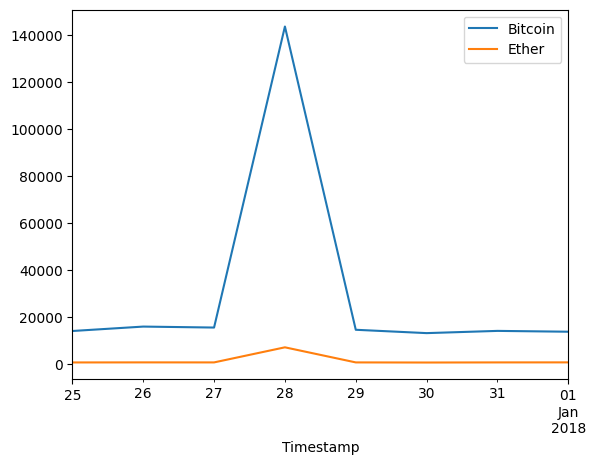

In [14]:
df['2017-12-25':'2018-01-01'].plot()

<Axes: xlabel='Timestamp'>

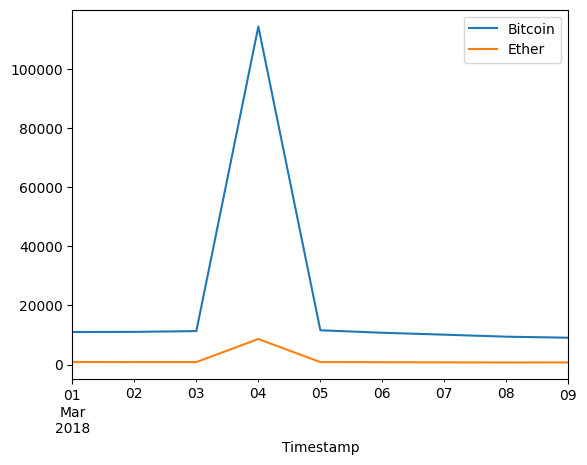

In [15]:
df['2018-03-01':'2018-03-09'].plot()

In [16]:
df_cleaned=df.drop(pd.to_datetime(['2017-12-28','2018-03-04']))

<Axes: xlabel='Timestamp'>

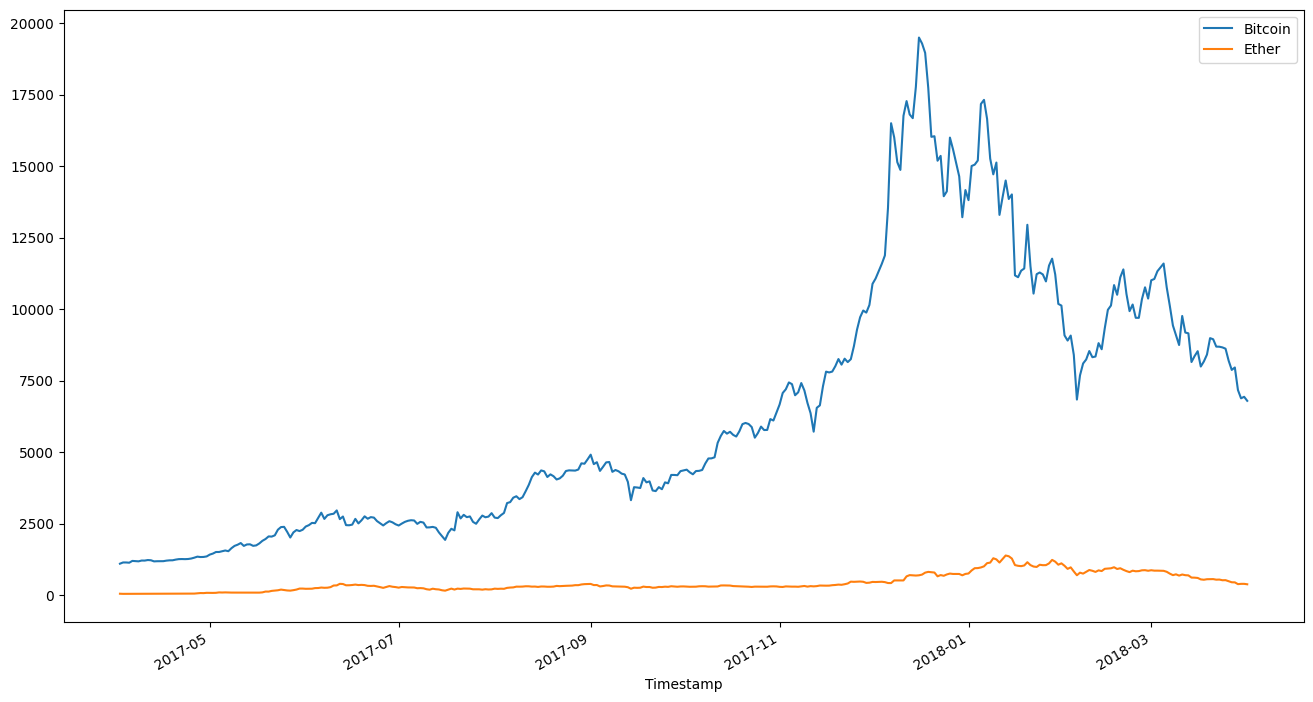

In [17]:
df_cleaned.plot(figsize=(16,9))

# Caleaning Analysis

## Central Tendency

#### mean

In [18]:
df.mean()

Bitcoin    6996.004022
Ether       469.609068
dtype: float64

In [19]:
df_cleaned.mean()

Bitcoin    6323.509186
Ether       428.628402
dtype: float64

#### median

In [20]:
df.median()

Bitcoin    4594.98785
Ether       309.49000
dtype: float64

#### mode

## Visualizing distribution

<Axes: ylabel='Frequency'>

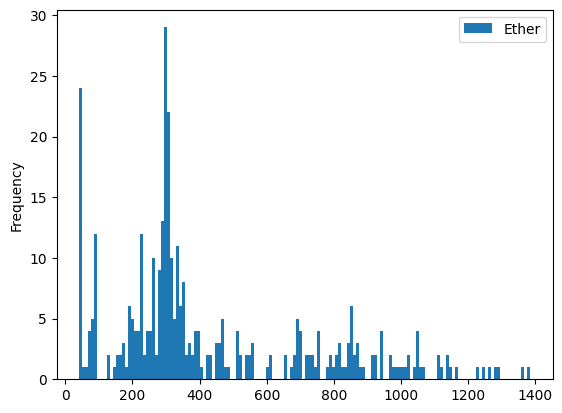

In [21]:
df_cleaned.plot(kind='hist',y='Ether',bins=150)

<Axes: ylabel='Frequency'>

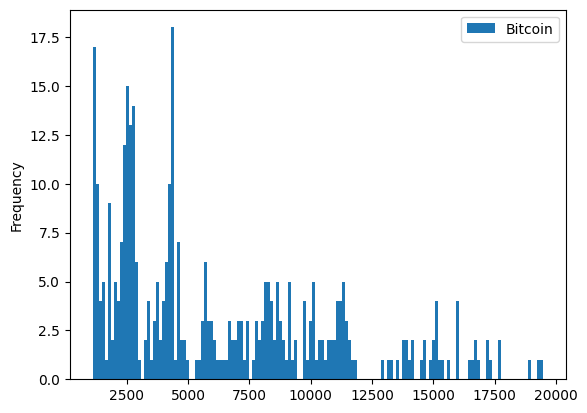

In [22]:
df_cleaned.plot(kind='hist',y='Bitcoin',bins=150)

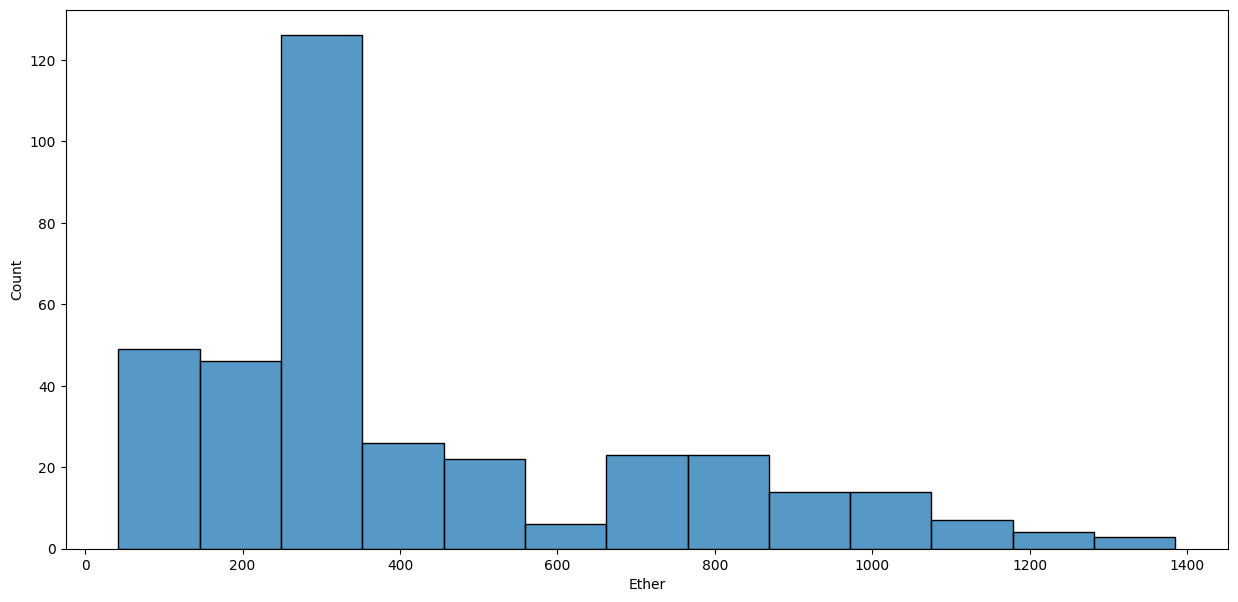

In [23]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(df_cleaned['Ether'], ax=ax)
plt.show()

<Axes: xlabel='Bitcoin', ylabel='Count'>

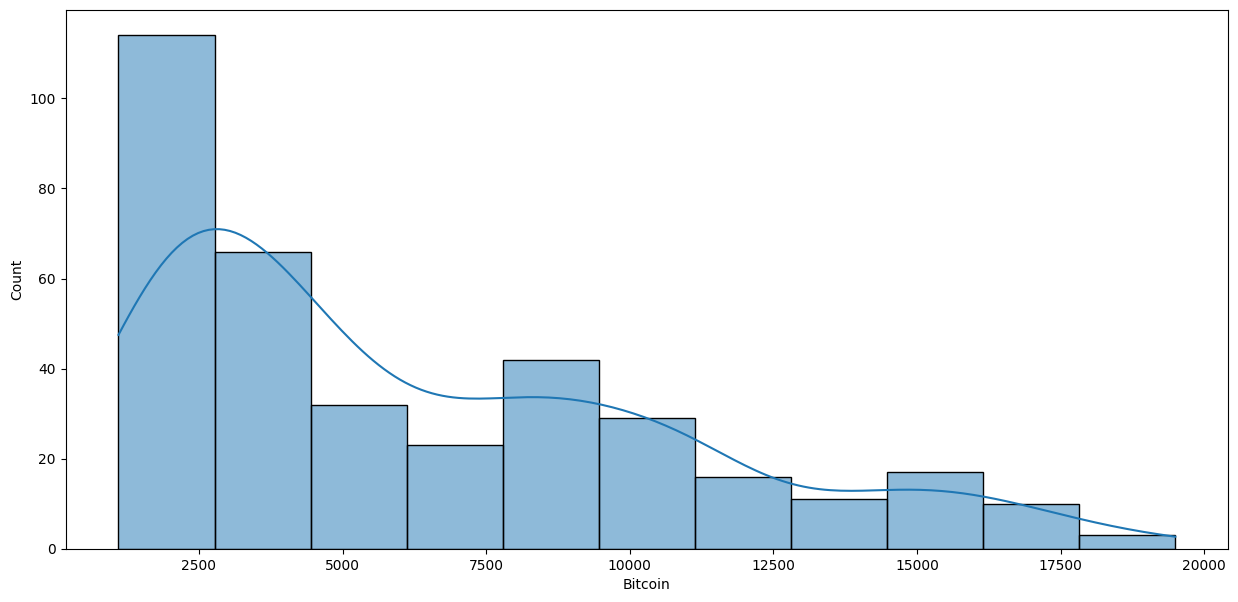

In [24]:
fig,ax=plt.subplots(figsize=(15,7))
sns.histplot(df_cleaned['Bitcoin'],kde=True,ax=ax)

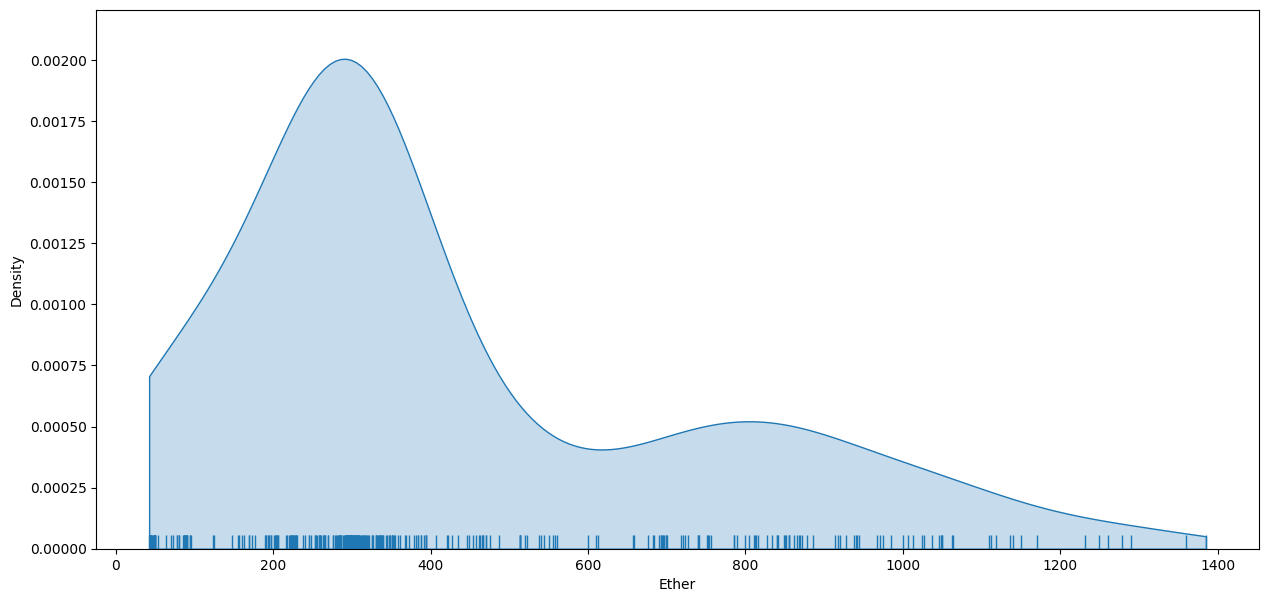

In [25]:
fig,ax=plt.subplots(figsize=(15,7))
sns.kdeplot(df_cleaned['Ether'],fill=True,cut=0,ax=ax)
sns.rugplot(df_cleaned['Ether'],ax=ax);

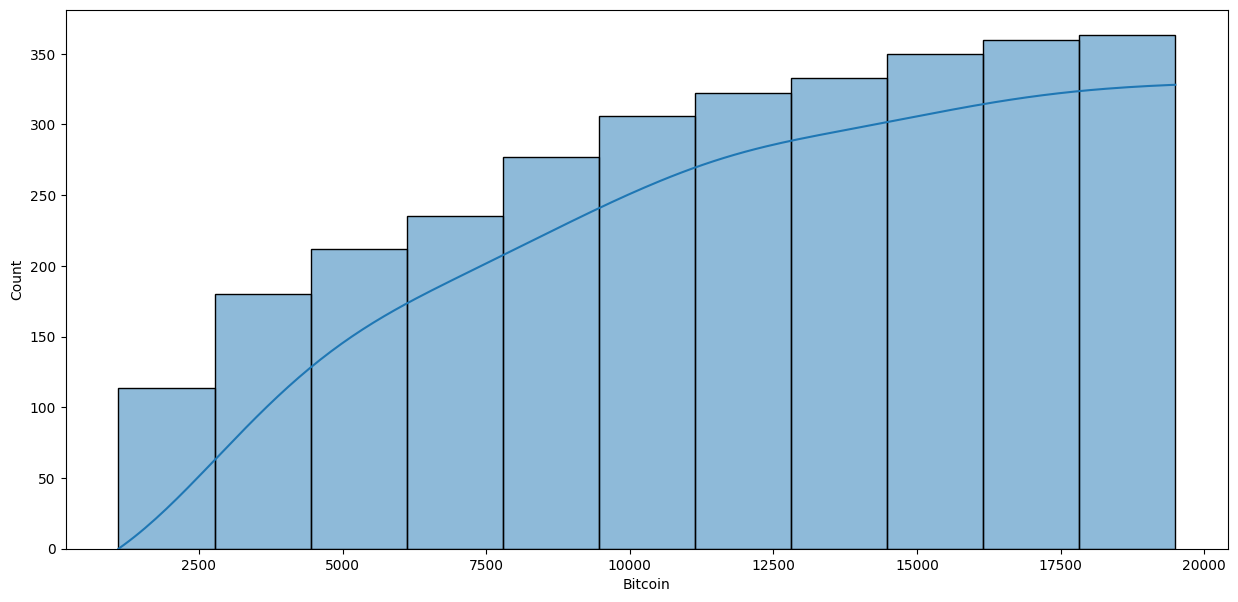

In [26]:
fig, ax=plt.subplots(figsize=(15,7))
sns.histplot(df_cleaned,x='Bitcoin',cumulative=True,ax=ax,kde=True)
plt.show()

<Axes: xlabel='Bitcoin', ylabel='Count'>

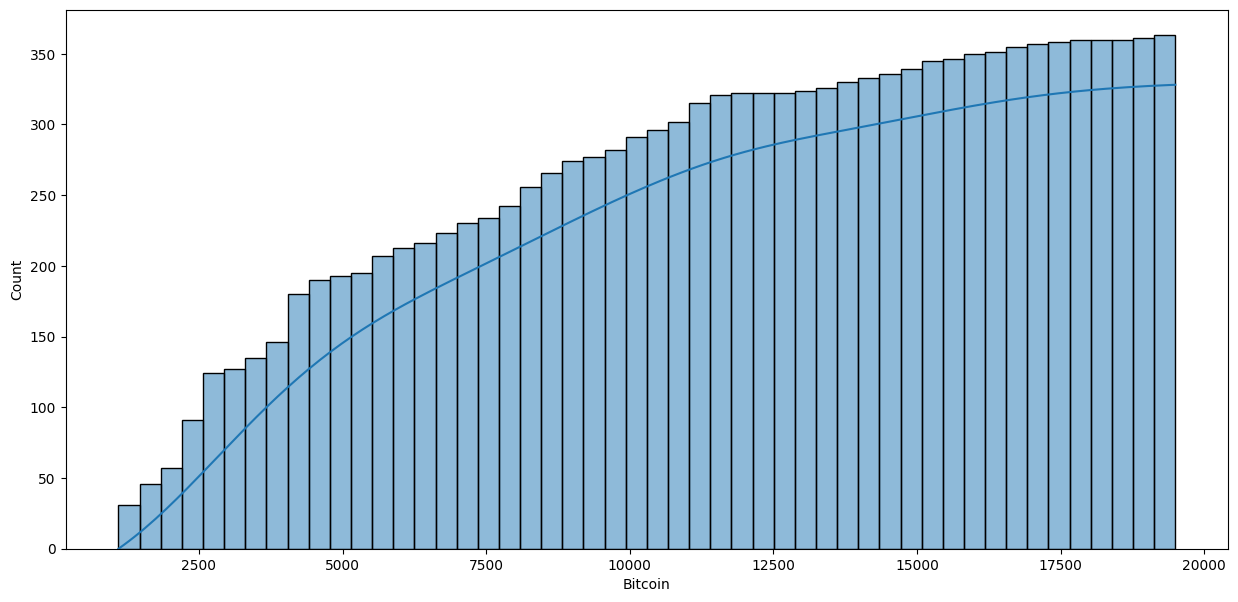

In [27]:
fig,ax=plt.subplots(figsize=(15,7))
sns.histplot(df_cleaned['Bitcoin'],ax=ax,bins=50,
             cumulative=True,kde=True)

## Visualizing bivariate distributions

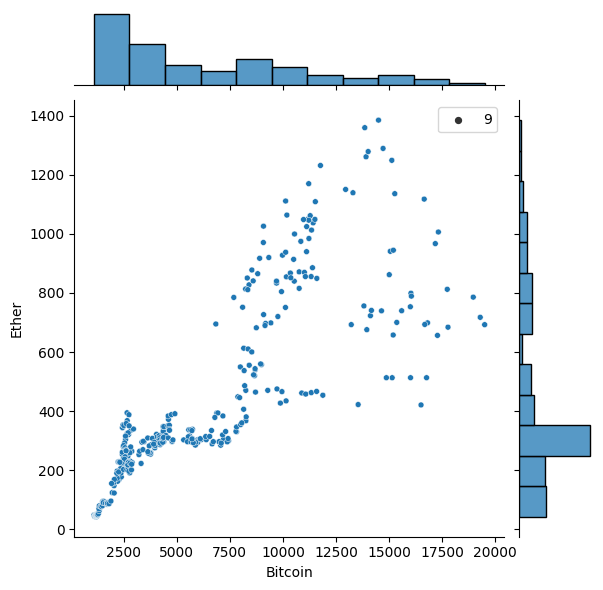

In [28]:
sns.jointplot(x="Bitcoin",y="Ether",data=df_cleaned,size=9)

<Axes: xlabel='Bitcoin', ylabel='Ether'>

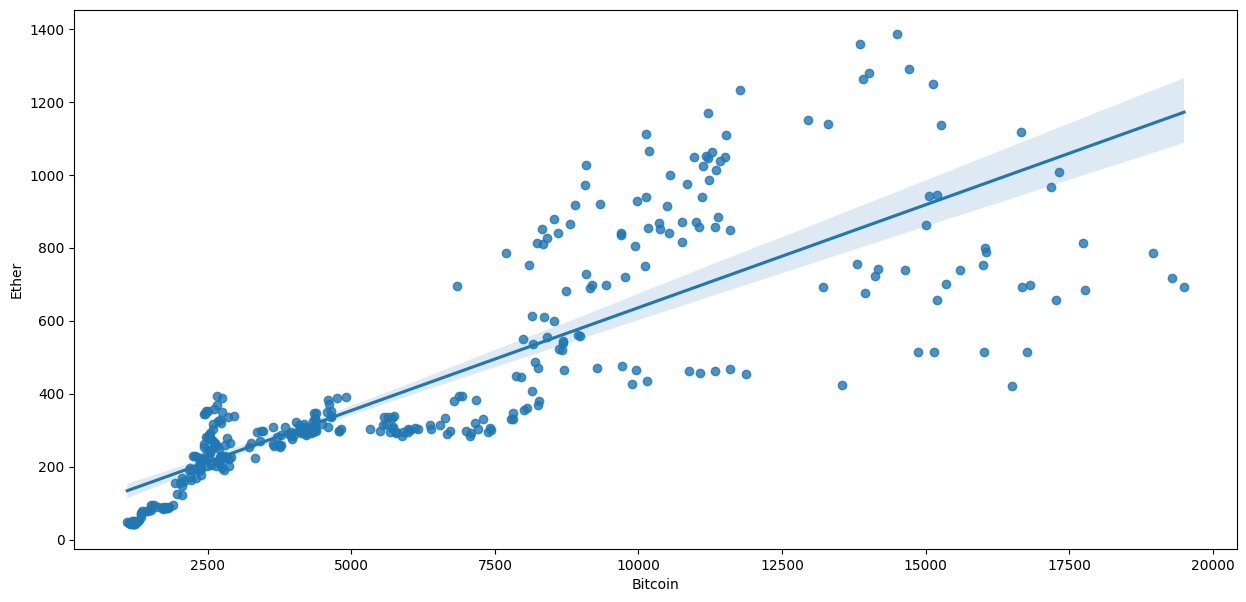

In [29]:
fig,ax=plt.subplots(figsize=(15,7))
sns.regplot(x="Bitcoin",y="Ether",data=df_cleaned,ax=ax)

## Quantiles,quartiles ans parcentiles

In [30]:
df_cleaned['Bitcoin'].quantile(.2)

2438.8627342857144

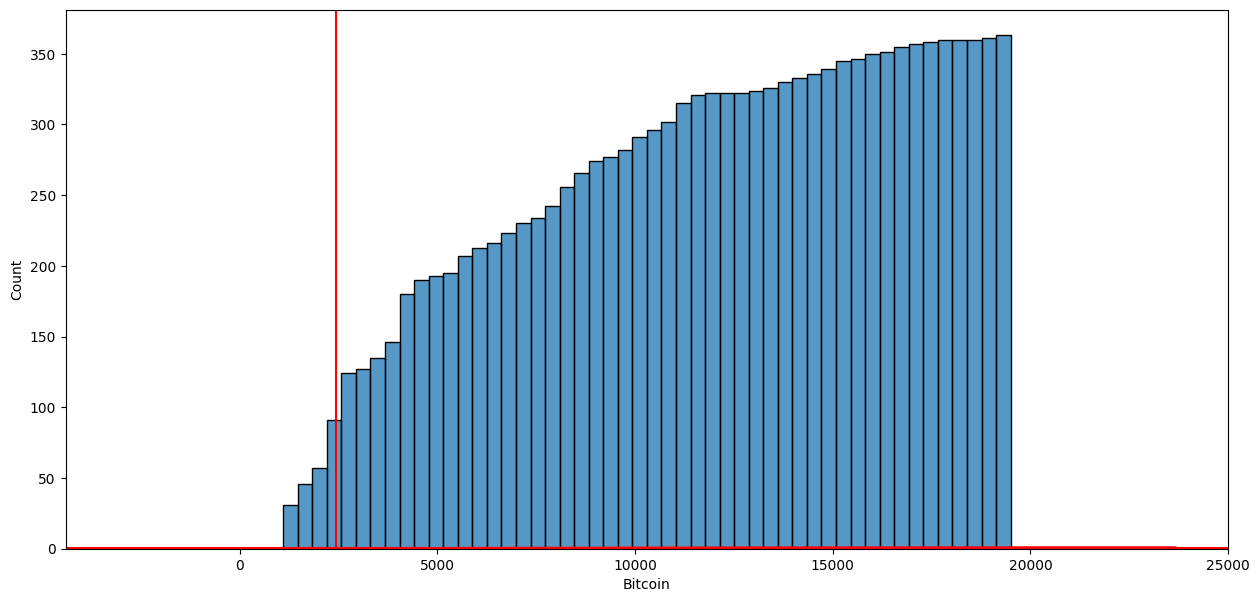

In [31]:
fig, ax = plt.subplots(figsize=(15, 7))

# Create a histogram using sns.histplot
sns.histplot(df_cleaned['Bitcoin'], ax=ax, bins=50, cumulative=True)

# Create a KDE plot using sns.kdeplot
sns.kdeplot(df_cleaned['Bitcoin'], cumulative=True, color='red', ax=ax)

# Add horizontal and vertical lines
ax.axhline(0.2, color='red')
ax.axvline(df_cleaned['Bitcoin'].quantile(0.2), color='red')

In [32]:
df_cleaned['Bitcoin'].quantile(.5)

4580.387479999999

In [33]:
df_cleaned['Bitcoin'].median()

4580.387479999999

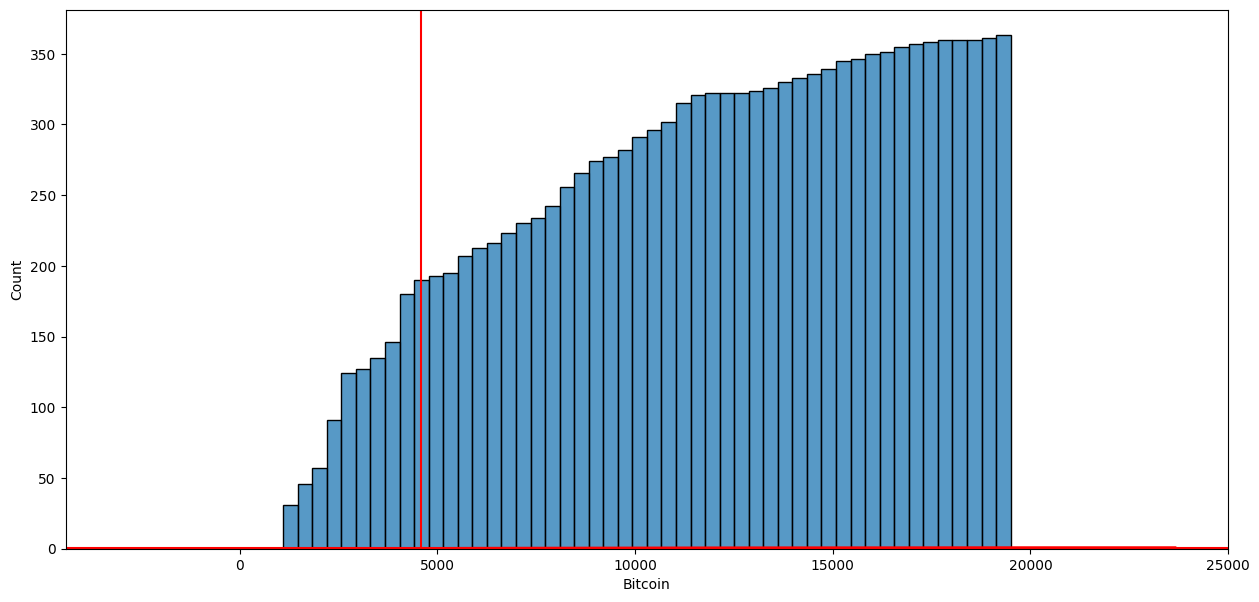

In [34]:
fig, ax = plt.subplots(figsize=(15, 7))

# Create a histogram using sns.histplot with cumulative=True
sns.histplot(df_cleaned['Bitcoin'], ax=ax, bins=50, cumulative=True)

# Create a KDE plot using sns.kdeplot with cumulative=True
sns.kdeplot(df_cleaned['Bitcoin'], cumulative=True, color='red', ax=ax)

# Add horizontal and vertical lines
ax.axhline(0.5, color='red')
ax.axvline(df_cleaned['Bitcoin'].quantile(0.5), color='red')

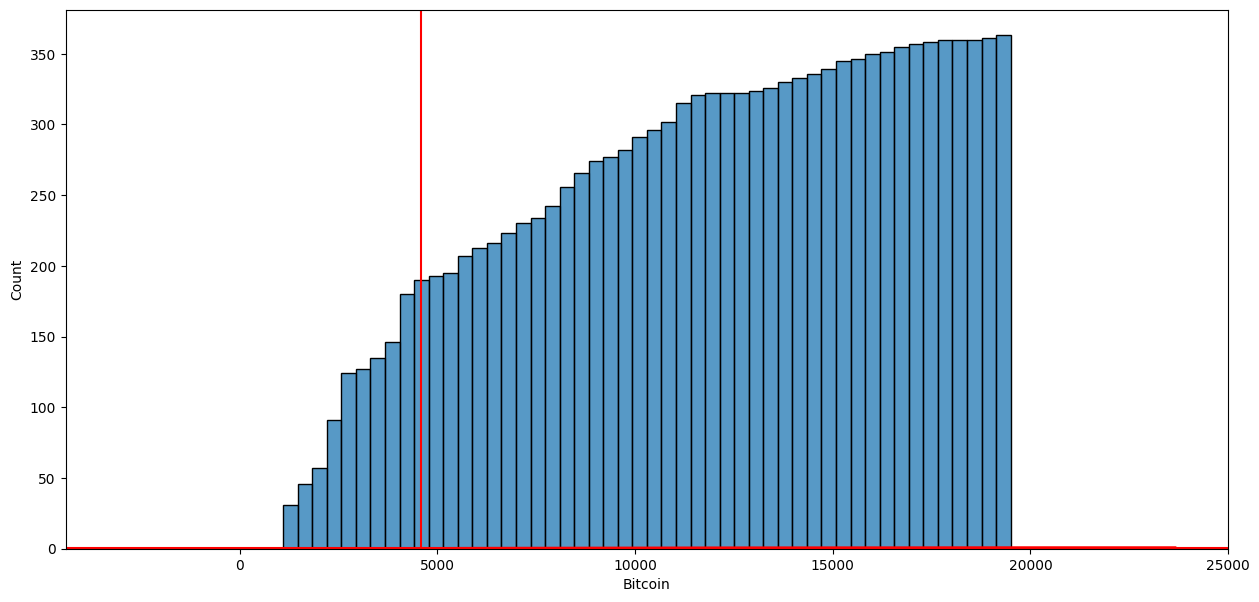

In [35]:
fig, ax = plt.subplots(figsize=(15, 7))

# Create a cumulative histogram using sns.histplot
sns.histplot(df_cleaned['Bitcoin'], ax=ax, bins=50, cumulative=True)

# Create a cumulative KDE plot using sns.kdeplot
sns.kdeplot(df_cleaned['Bitcoin'], cumulative=True, color='red', ax=ax)

# Add horizontal and vertical lines at the 50th percentile (median)
ax.axhline(0.5, color='red')
ax.axvline(df_cleaned['Bitcoin'].median(), color='red')

## Dispersion

### Range

In [36]:
df['Bitcoin'].max()-df['Bitcoin'].min()

142706.6475416667

In [37]:
df_cleaned['Bitcoin'].max()-df_cleaned['Bitcoin'].min()

18399.51420833333

#### Variance and Standard Deviation

In [38]:
df['Bitcoin'].var()

103766537.75278121

In [39]:
df['Bitcoin'].std()

10186.586167739475

In [40]:
df_cleaned['Bitcoin'].std()

4513.757662530282

##  IQR

In [41]:
df['Bitcoin'].quantile(.75)-df['Bitcoin'].quantile(.25)

6597.494147619047

In [42]:
df_cleaned['Bitcoin'].quantile(.75)-df_cleaned['Bitcoin'].quantile(.25)

6548.249242559523

## Analyticla Analysis of invalid values

#### Using std: Z scores 

In [43]:
upper_limit=df['Bitcoin'].mean()+2*df['Bitcoin'].std()
lower_limit=df['Bitcoin'].mean()-2*df['Bitcoin'].std()

In [44]:
print("Upper Limit:{}".format(upper_limit))
print("Lower Limit:{}".format(lower_limit))

In [45]:
fig, ax = plt.subplots(figsize=(15, 7))

# Create a distribution plot using seaborn
sns.histplot(df['Bitcoin'], ax=ax,kde=True)

# Add vertical lines at the specified lower and upper limits
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

#### Using IQRs

In [46]:
iqr=df['Bitcoin'].quantile(.75)-df['Bitcoin'].quantile(.25)
iqr

In [47]:
upper_limit=df['Bitcoin'].mean()+2*iqr
lower_limit=df['Bitcoin'].mean()-2*iqr

In [48]:
print("Upper Limit:{}".format(upper_limit))
print("Lower Limit:{}".format(lower_limit))

In [49]:
fig,ax=plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

## Cleaning invalid values analytically

In [50]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()

In [51]:
df[df['Bitcoin'] < upper_limit].plot(figsize=(16, 7))

In [52]:
df.drop(df[df['Bitcoin'] > upper_limit].index).plot(figsize=(16, 7))